In [1]:
import sys
import numpy as np

# Import readsav so we can read IDL Save Files
import warnings
from scipy.io import readsav

from astropy.table import (
    Table,
    join,
    vstack,
    )

import dateutil.parser
import datetime

from astropy.io import ascii

In [2]:
jmbPath = "/home/bizard/astronomy/python"

if (jmbPath not in sys.path):
    sys.path.insert(0,jmbPath)

import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib inline


In [3]:
from astropy.io import fits

In [4]:
hdus = fits.open('34411_210101.1068.fits') # Read fits file into hdus variable

In [5]:
data = hdus[1].data # place data from HDU 1 into data variable

In [6]:
data.columns # print names of columns in data

ColDefs(
    name = 'spectrum'; format = '7920D'
    name = 'uncertainty'; format = '7920D'
    name = 'offset'; format = '7920D'
    name = 'offset_uncertainty'; format = '7920D'
    name = 'reduced_chi'; format = '7920D'
    name = 'n_pixels'; format = '7920I'; unit = 'pixels'
    name = 'pixel_mask'; format = '7920L'
    name = 'blaze'; format = '7920D'; unit = 'e-'
    name = 'orders'; format = 'I'
    name = 'wavelength'; format = '7920D'; unit = 'angstroms'
    name = 'bary_wavelength'; format = '7920D'; unit = 'angstroms'
    name = 'continuum'; format = '7920D'
    name = 'continuum_mask'; format = '7920L'
    name = 'tellurics'; format = '7920D'
    name = 'bary_excalibur'; format = '7920D'; unit = 'angstroms'
    name = 'excalibur'; format = '7920D'; unit = 'angstroms'
    name = 'excalibur_mask'; format = '7920L'; unit = 'unitless'
)

In [7]:
hdus[1].header

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =               799922 / length of dimension 1                          
NAXIS2  =                   86 / length of dimension 2                          
PCOUNT  =                    0 / number of group parameters                     
GCOUNT  =                    1 / number of groups                               
TFIELDS =                   17 / number of table fields                         
EXTNAME = 'optimal '           / Extraction algorithm                           
DATE-EXT= '2021-06-04T17:44:52.160' / Date and time of extraction               
SCATLGHT=                    T / Scattered light removed before extraction      
EXT_SIZE=                   33 / Size of the extraction window (pixels)         
FLAT_REL=                   

In [8]:
data['spectrum'].shape

(86, 7920)

In [9]:
data['orders']

array([160, 159, 158, 157, 156, 155, 154, 153, 152, 151, 150, 149, 148,
       147, 146, 145, 144, 143, 142, 141, 140, 139, 138, 137, 136, 135,
       134, 133, 132, 131, 130, 129, 128, 127, 126, 125, 124, 123, 122,
       121, 120, 119, 118, 117, 116, 115, 114, 113, 112, 111, 110, 109,
       108, 107, 106, 105, 104, 103, 102, 101, 100,  99,  98,  97,  96,
        95,  94,  93,  92,  91,  90,  89,  88,  87,  86,  85,  84,  83,
        82,  81,  80,  79,  78,  77,  76,  75], dtype=int16)

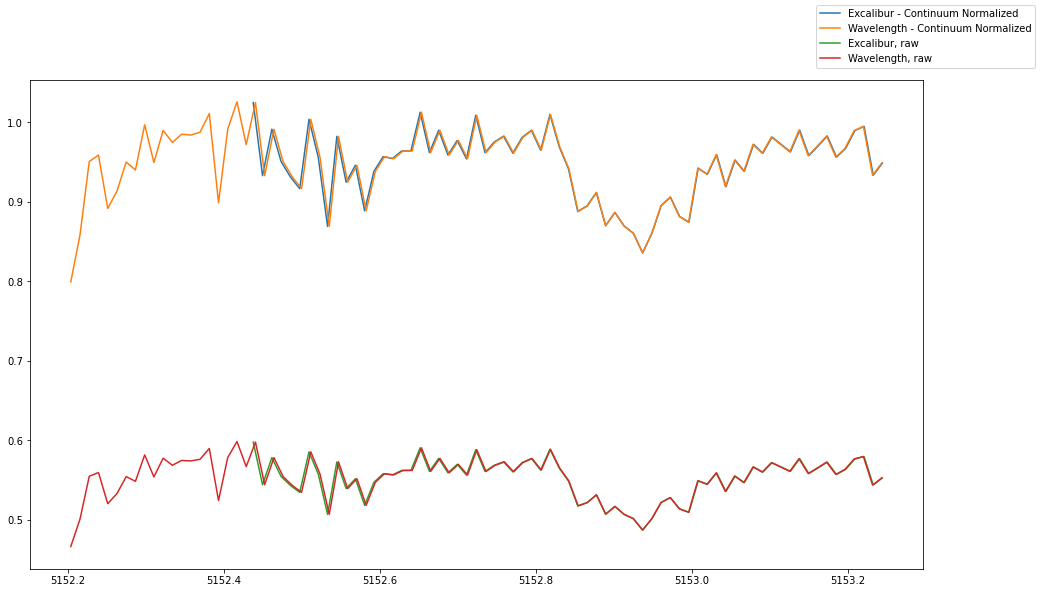

In [18]:
order = 42
r = (0,250)

fig,ax = plt.subplots(1,1, figsize=[16,9])

ax.plot(data['excalibur'][order,r[0]:r[1]],data['spectrum'][order,r[0]:r[1]]/data['continuum'][order,r[0]:r[1]],
       label="Excalibur - Continuum Normalized")
#ax.plot(data['excalibur'][order,r[0]:r[1]],data['continuum'][order,r[0]:r[1]])

ax.plot(data['wavelength'][order,r[0]:r[1]],data['spectrum'][order,r[0]:r[1]]/data['continuum'][order,r[0]:r[1]],
       label="Wavelength - Continuum Normalized")
ax.plot(data['excalibur'][order,r[0]:r[1]],data['spectrum'][order,r[0]:r[1]],
       label="Excalibur, raw")

ax.plot(data['Wavelength'][order,r[0]:r[1]],data['spectrum'][order,r[0]:r[1]],
       label="Wavelength, raw")


l = fig.legend()

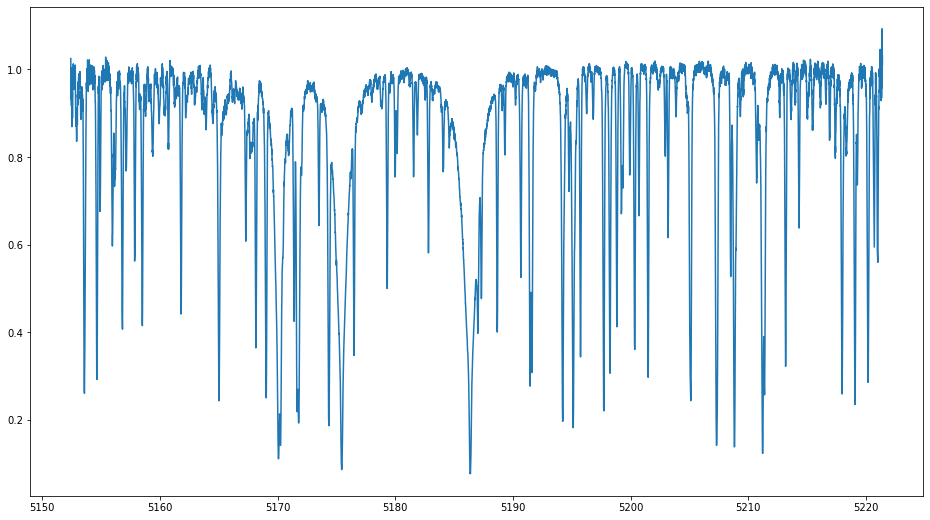

In [19]:
fig,ax = plt.subplots(1,1, figsize=[16,9])
ax.plot(data['excalibur'][order,:],data['spectrum'][order,:]/data['continuum'][order,:])

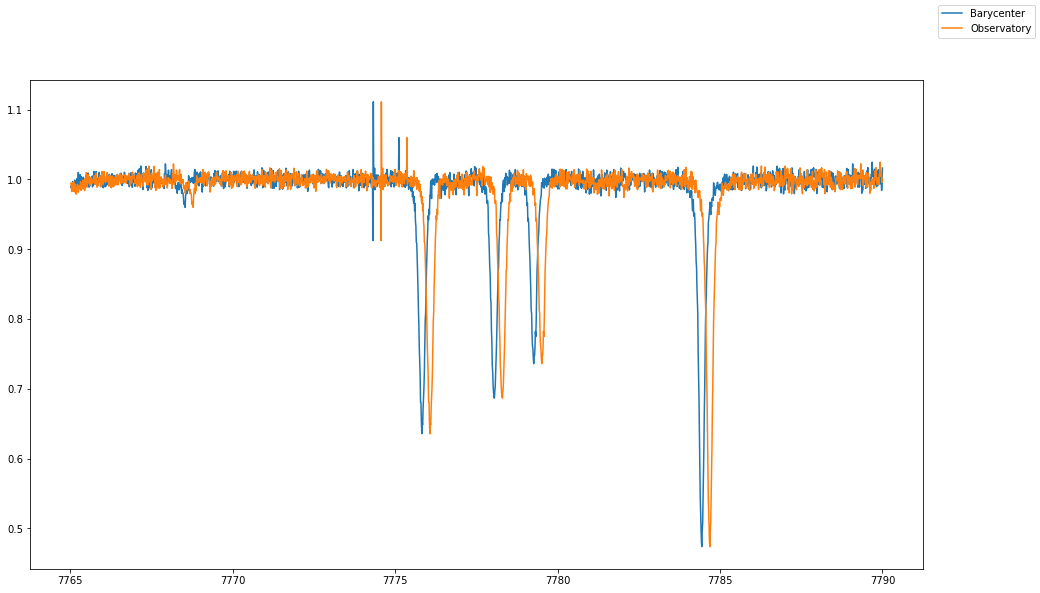

In [21]:
order=81
sel = (data['bary_wavelength'][order,:] > 7765) & (data['bary_wavelength'][order,:] < 7790)
sel2 = (data['wavelength'][order,:] > 7765) & (data['wavelength'][order,:] < 7790)


fig,ax = plt.subplots(1,1, figsize=[16,9])
ax.plot(data['bary_wavelength'][order,sel],
        (data['spectrum'][order,sel]/data['continuum'][order,sel]),label="Barycenter")


ax.plot(data['wavelength'][order,sel2],
        (data['spectrum'][order,sel2]/data['continuum'][order,sel2]),label="Observatory")

l = fig.legend()

In [22]:
data['excalibur'][order,:]

array([nan, nan, nan, ..., nan, nan, nan])

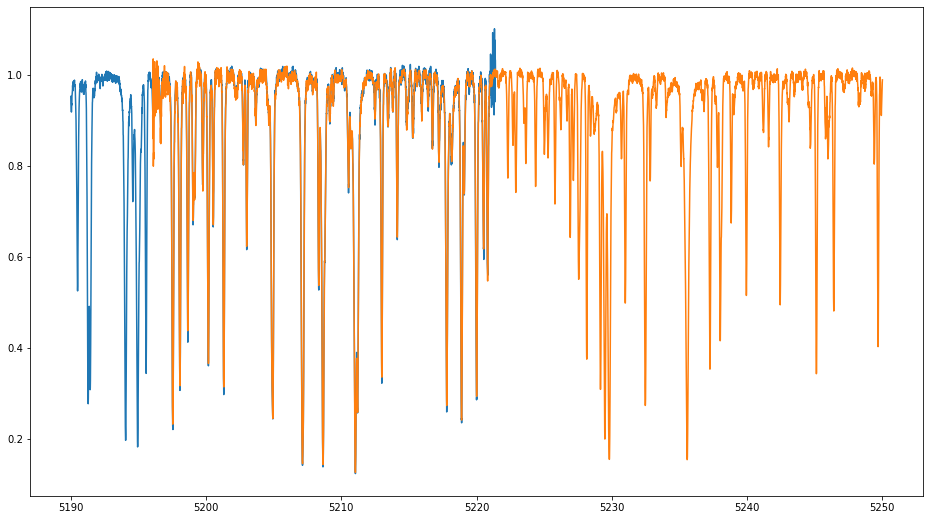

In [23]:
order = 42
order2 = 43
sel = (data['bary_wavelength'][order,:] > 5190)
sel2 = (data['bary_wavelength'][order2,:] < 5250)


fig,ax = plt.subplots(1,1, figsize=[16,9])
ax.plot(data['bary_wavelength'][order,sel],
        (data['spectrum'][order,sel]/data['continuum'][order,sel]))
ax.plot(data['bary_wavelength'][order2,sel2],
        (data['spectrum'][order2,sel2]/data['continuum'][order2,sel2]))

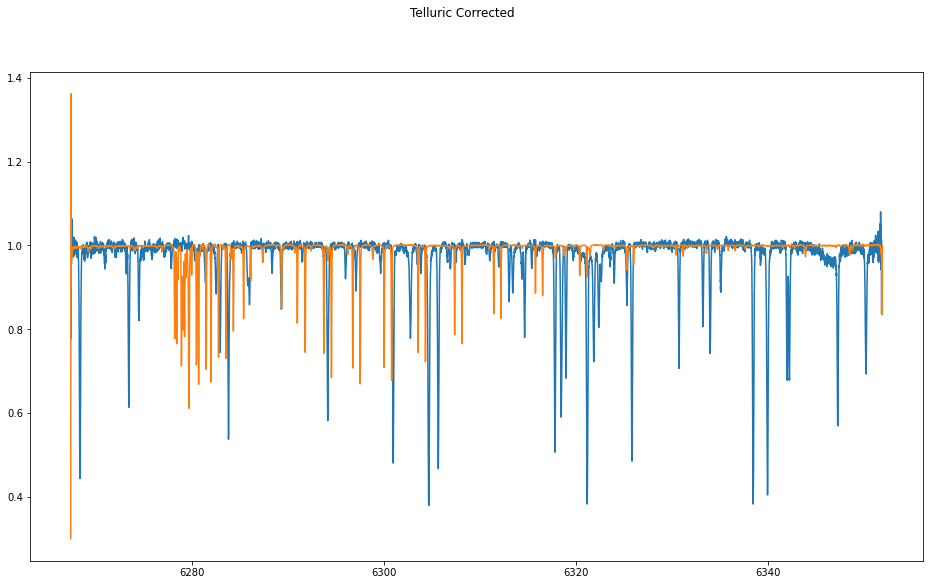

In [32]:
order=63
sel = (data['bary_wavelength'][order,:] > 0) #(data['bary_wavelength'][order,:] > 6930) & (data['bary_wavelength'][order,:] < 6960)
sel2 = sel #(data['wavelength'][order,:] > 6930) & (data['wavelength'][order,:] > 6960)


fig,ax = plt.subplots(1,1, figsize=[16,9])
t = fig.suptitle("Telluric Corrected")

p = ax.plot(data['bary_wavelength'][order,sel],
        (data['spectrum'][order,sel]/data['continuum'][order,sel])/data['tellurics'][order,sel])
p = ax.plot(data['bary_wavelength'][order,sel],
        (data['tellurics'][order,sel]))



#ax.plot(data['wavelength'][order,sel2],
#        (data['spectrum'][order,sel2]/data['continuum'][order,sel2]))

In [33]:
head = hdus[0].header

In [34]:
float(head['MOONDIST'])

46.159334708602

In [35]:
for k in head.keys():
    print("{}: {}".format(k,head[k]))

SIMPLE: True
BITPIX: 8
NAXIS: 0
EXTEND: True
SITELONG: -111.422515
SITELAT: 34.744305
SITEELEV: 2337.0
TELESCP: DCT
INSTRMNT: EXPRES
DETECTOR: STA1600
FPA: EXPRES-D0
CNTRTYPE: STA-Archon
CNTRVRS: 1
CNTRFIRM: /Users/expresadmin/archon/
OBSERVER: Debra Fischer
OBJECT: 34411
OBS_ID: 210101.1068
PROGRAM: 100
RA: 05:19:09.31
DEC: 40:05:38.90
FRAME: FK5
OBSTYPE: Science
PRESETMO: science
REQRA: 05:19:08.088
REQDEC: +40:06:02.520
MAXEXP: 1200
REXPTIME: 1200
HDRVRSN: 1.0
MIDPOINT: 2021-01-01T07:39:13.989
AEXPTIME: 1106.9300000000023
EXPMTR: True
AGITATOR: True
ADCSTAT: Actively Correcting
EXPTHRES: 720000
EXPCOUNT: 720511.0
CRYTEMP0: -187.886896
CRYTEMP1: -110.00004
CRYTEMP2: -65.573576
CRYPRESS: 5.468E-7
DATE-OBS: 2021-01-01 07:30:00
DATE-SHT: 2021-01-01T07:30:00.524
DATE-END: 2021-01-01T07:48:27.454
EQUNIOX: 2000
CAL-TYPE: 
LAMP: Off
FOC-POS: 43900
EFI-POS: 34000
TELMJD: 59215.31249666259
TELALT: 71:48:39.80
TELAZ: 293:13:21.30
HA: 01:28:20.02
MOONDIST: 46.159334708602
SUNDIST: 154.790063729

In [36]:
for i in head.items():
    print(i)

('SIMPLE', True)
('BITPIX', 8)
('NAXIS', 0)
('EXTEND', True)
('SITELONG', '-111.422515')
('SITELAT', '34.744305')
('SITEELEV', '2337.0')
('TELESCP', 'DCT')
('INSTRMNT', 'EXPRES')
('DETECTOR', 'STA1600')
('FPA', 'EXPRES-D0')
('CNTRTYPE', 'STA-Archon')
('CNTRVRS', '1')
('CNTRFIRM', '/Users/expresadmin/archon/')
('OBSERVER', 'Debra Fischer')
('OBJECT', '34411')
('OBS_ID', '210101.1068')
('PROGRAM', '100')
('RA', '05:19:09.31')
('DEC', '40:05:38.90')
('FRAME', 'FK5')
('OBSTYPE', 'Science')
('PRESETMO', 'science')
('REQRA', '05:19:08.088')
('REQDEC', '+40:06:02.520')
('MAXEXP', '1200')
('REXPTIME', '1200')
('HDRVRSN', '1.0')
('MIDPOINT', '2021-01-01T07:39:13.989')
('AEXPTIME', '1106.9300000000023')
('EXPMTR', 'True')
('AGITATOR', 'True')
('ADCSTAT', 'Actively Correcting')
('EXPTHRES', '720000')
('EXPCOUNT', '720511.0')
('CRYTEMP0', '-187.886896')
('CRYTEMP1', '-110.00004')
('CRYTEMP2', '-65.573576')
('CRYPRESS', '5.468E-7')
('DATE-OBS', '2021-01-01 07:30:00')
('DATE-SHT', '2021-01-01T07:30:

In [37]:
hdus[0].data

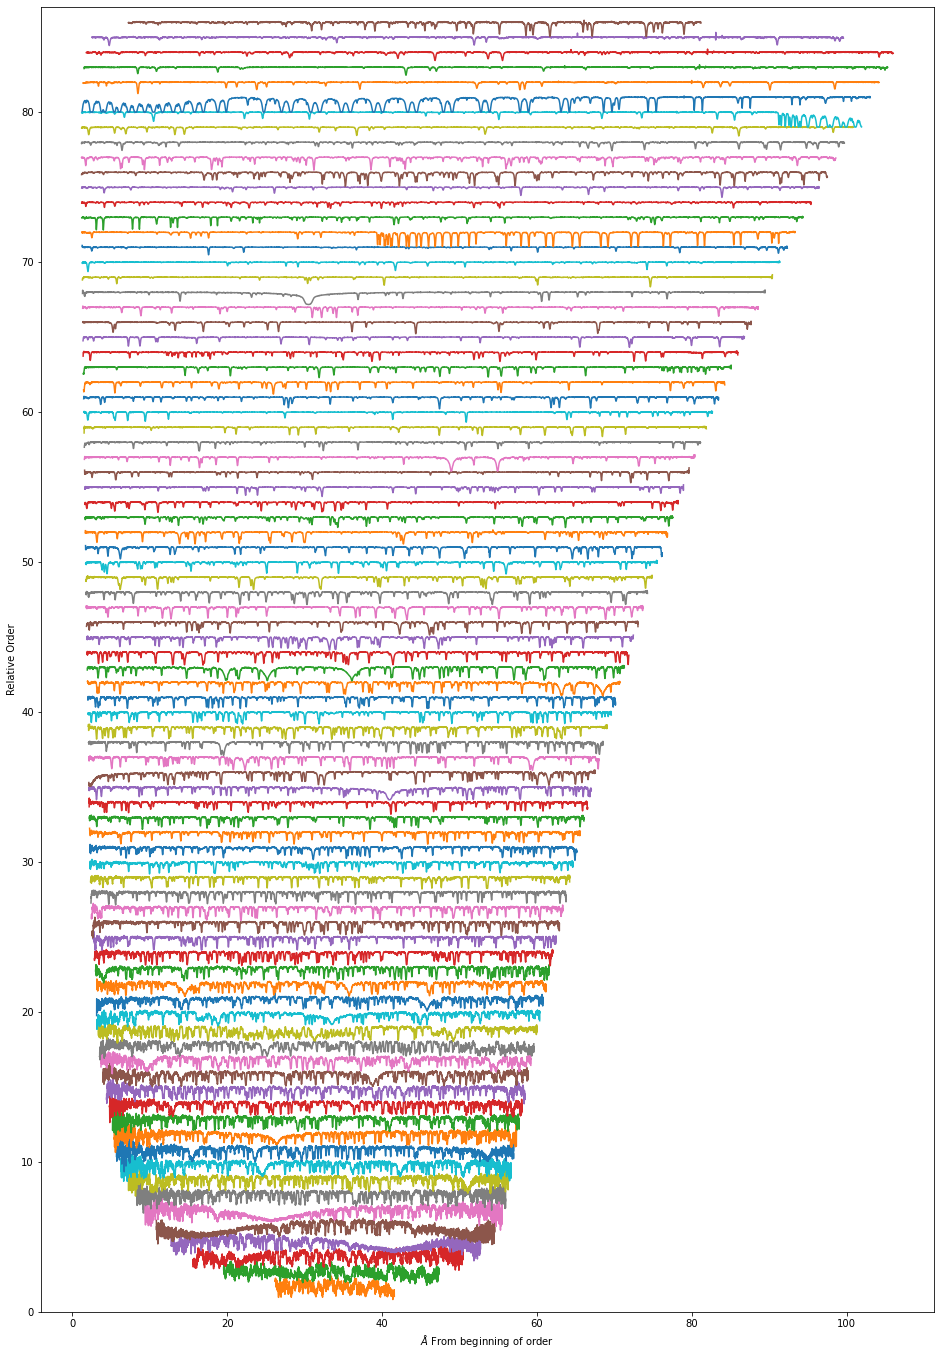

In [39]:
fig,ax = plt.subplots(1,1, figsize=[16,24])
for o in range(86):
    p = ax.plot(data['wavelength'][o,:]-data['wavelength'][o,0],o + (data['spectrum'][o,:]/data['continuum'][o,:]))

l = ax.set_xlabel('$\AA$ From beginning of order')
l = ax.set_ylabel('Relative Order')
l = ax.set_ylim([0,87])